In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import random
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [3]:
num, val = [n for n in range(0, 20001, 1000)], []

for n in num:
    
    t0 = time.time()
    for i1 in range(n):
        for i2 in range(n):
            pass
    val.append(time.time() - t0)
    print(n, val[-1])

df2 = pd.DataFrame()
df2['x'], df2['y'] = num, val

0 9.5367431640625e-07
1000 0.0588839054107666
2000 0.16203093528747559
3000 0.3681638240814209
4000 0.6579930782318115
5000 1.1703009605407715
6000 1.836273193359375
7000 2.074368953704834
8000 2.678208112716675
9000 3.206552028656006
10000 3.907796859741211
11000 4.640864133834839
12000 6.179374933242798
13000 7.951981067657471
14000 8.581130981445312
15000 9.071255922317505
16000 11.149094820022583
17000 12.245162963867188
18000 14.310895919799805
19000 16.477358102798462
20000 16.43735694885254


In [4]:
num, val = [n for n in range(0, 1001, 200)], []

for n in num:
    
    t0 = time.time()
    for i1 in range(n):
        for i2 in range(n):
            for i3 in range(n):
                pass
    val.append(time.time() - t0)
    print(n, val[-1])

df3 = pd.DataFrame()
df3['x'], df3['y'] = num, val

0 1.9073486328125e-06
200 0.24631309509277344
400 2.2530460357666016
600 8.995447874069214
800 22.265347957611084
1000 46.50631499290466


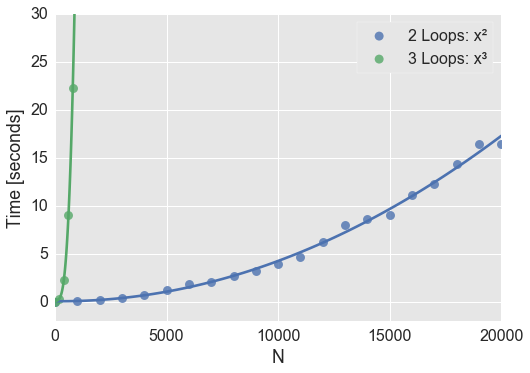

In [24]:
sns.set_style("darkgrid", {"axes.facecolor": ".9", 'legend.frameon': True})
sns.plotting_context("notebook", font_scale=5.5)

ax = sns.regplot(x="x", y="y", data=df2, scatter_kws={"s": 80}, order=2, ci=None, truncate=True, label = '2 Loops: x²')
ax = sns.regplot(x="x", y="y", data=df3, scatter_kws={"s": 80}, order=3, ci=None, truncate=True, label = '3 Loops: x³')
ax.legend(loc="best")
ax.set(xlabel='N', ylabel='Time [seconds]', ylim=(-2, 30), xlim=(0, 20000))
fig = ax.get_figure()


fig.savefig("scaling.pdf")

In [7]:
import statsmodels.formula.api as sm

model = sm.ols(formula = 'y ~ np.power(x, 2) + np.power(x, 1)', data = df2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     1761.
Date:                Thu, 29 Sep 2016   Prob (F-statistic):           2.27e-21
Time:                        19:35:26   Log-Likelihood:                -9.8801
No. Observations:                  21   AIC:                             25.76
Df Residuals:                      18   BIC:                             28.89
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          0.0447      0.250      0.179      0.860        -0.480     0.569
np.power(x, 2)  4.425e-08   2.79e-09     15.843      0.000      3.84e-08  5.01e-08
np.power(x, 1) -2.277e-05   5.79e-05     -0.394      0.699        -0.000  9.88e-05
==============================================================================
Omnibus:                        1.399   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.497   Jarque-Bera (JB):                0.295
Skew:                           0.130   Prob(JB):                        0.863
Kurtosis:                       3.519   Cond. No.                     5.07e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.07e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

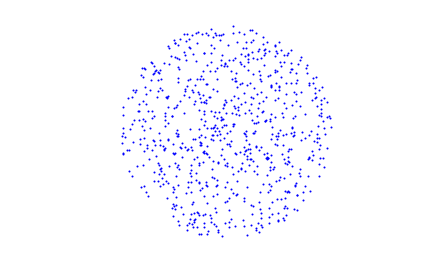

In [53]:
import matplotlib.pyplot as plt
from random import random
%matplotlib inline

x, y = [], []
for n in range(1000):
    
    xi, yi = random() - 0.5, random() - 0.5
    if xi*xi + yi*yi > 0.25: continue
    
    x.append(xi)
    y.append(yi)

plt.axis('equal')
plt.axis('off')
plt.scatter(x, y, color = "b", s = 1.)
plt.tight_layout()
plt.savefig('circle_points.pdf',dpi=300)    
    